In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv('mnist_train.csv')


In [5]:
print('Rows and columns in the data ',data.shape)
print('Dimenstiona;lity of the data ',data.shape[1])

Rows and columns in the data  (42000, 785)
Dimenstiona;lity of the data  785


In [6]:
#the label column contains the final class label or the output varriable 
#lets drop the class label i.e yi and keep only the xi's 
l = data['label']
d = data.drop('label',axis=1)

In [7]:
#checking the shape of d after the removeal of the label series i,e yi
d.shape[1]

784

In [8]:
#each row in the d datafrsme containe 784 features representing a number(0-9) when reshaped 
#to 28*28 matrix
#here the random row is chosen here 0, containf 784 elements which is then converted to 28*28 mattix
i = int(input('enter any number from 0-784'))
samp_arr = np.array(d.loc[i])
samp = samp_arr.reshape(28,28)


enter any number from 0-7845


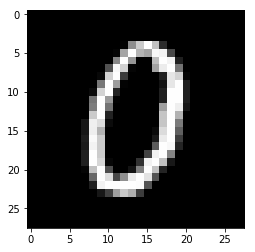

In [9]:
plt.imshow(samp,interpolation=None,cmap='gray')
plt.show()

In [10]:
print('verifying the image with the class label : ',l[i])

verifying the image with the class label :  0


In [11]:
#Reducing the dimnesionality using the PCA step by step

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
d_samp = d.head(15000)
l_samp = l.head(15000)



In [14]:
#step 1 : standardise the data
standardised_values = StandardScaler().fit_transform(d_samp)
#step 2 find the covariance matrix S
covar_matrix = (np.matmul(standardised_values.T,standardised_values))*(1/15000)


In [15]:
#Step 3 find the eigen values and the eigen vector from the covar matrix
from scipy.linalg import eigh
eigen_values,eigen_vectors = eigh(covar_matrix,eigvals=(782,783))

In [16]:
#inspecting the eigen values and eigen vectors

print(' shape of eigen_values ',eigen_values.shape)
print(' shape of eigen_vectros ',eigen_vectors.shape)

print(eigen_vectors)
print(eigen_values)
# eigen_vectors = eigen_vectors.T


 shape of eigen_values  (2,)
 shape of eigen_vectros  (784, 2)
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[29.03550386 40.38128612]


In [17]:
print(eigen_vectors.shape)
eigen_vectors = eigen_vectors.T
print(eigen_vectors.shape)
v1 = eigen_vectors[1]
v2 = eigen_vectors[0]
print(v1.shape)
print(v2.shape)
e = np.array([v1,v2])
print(e.shape)
e = e.T
print(e.shape)

(784, 2)
(2, 784)
(784,)
(784,)
(2, 784)
(784, 2)


In [18]:
#compute the transormed data using the pca for maximised variance
print(e)
outcome = np.matmul(standardised_values,e)
print('shape of standardised_values ',standardised_values.shape)
print('shape of eigen_vectors ',e.shape)
print('shape of outcome ',outcome.shape)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
shape of standardised_values  (15000, 784)
shape of eigen_vectors  (784, 2)
shape of outcome  (15000, 2)


In [19]:
df = pd.DataFrame(data=outcome,columns=['first','second'])
df.head()

,first,second
0,-5.043558,-5.558661
1,19.305278,6.193635
2,-7.678775,-1.909878
3,-0.464845,5.525748
4,26.644289,6.366527


In [20]:
df['labels'] = l_samp

In [21]:
print(df)

           first     second  labels
0      -5.043558  -5.558661       1
1      19.305278   6.193635       0
2      -7.678775  -1.909878       1
3      -0.464845   5.525748       4
4      26.644289   6.366527       0
5       1.201279  -0.557059       0
6      -6.118906   6.440129       7
7       0.215520   4.421476       3
8      -0.724664  -1.315634       5
9       3.106035  -2.603522       3
10      0.521896  -4.865919       8
11     -5.077128  -2.417982       9
12     -8.126317  -2.070965       1
13      1.175139  13.625508       3
14      6.435996   0.355688       3
15     -8.004978  -1.239159       1
16      0.619563   5.284199       2
17      8.356832  -9.519940       0
18     -6.802767   1.647782       7
19     11.790011   4.956147       5
20     -3.643102  -5.293540       8
21      4.728578  -7.265334       6
22      0.528768  -1.127893       2
23     20.915435   4.634770       0
24     -1.586639   6.557648       2
25      1.873747  -4.346672       3
26     -0.790410  -1.305911 

In [22]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardised_values)
print('dim of reduced data ',pca_data.shape)
df = pd.DataFrame(data = pca_data,columns=['first_principle','second_priciple'])
print(df.head())

dim of reduced data  (15000, 2)
   first_principle  second_priciple
0        -5.043577        -5.558589
1        19.305259         6.193478
2        -7.678762        -1.910327
3        -0.464875         5.525206
4        26.644271         6.366670


784
784
29.113306727004446


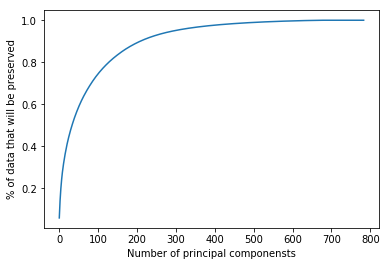

In [35]:
pca1  = decomposition.PCA()
pca1.n_componenets = 250
pca_data = pca1.fit_transform(standardised_values)
percentage_explainned_variance = pca1.explained_variance_/np.sum(pca1.explained_variance_)
# print(percentage_explainned_variance)
print(len(percentage_explainned_variance))

calculated = np.cumsum(percentage_explainned_variance)
print(len(calculated))
print(calculated[9]*100)
# print(calculated)
plt.plot(calculated)
plt.ylabel('% of data that will be preserved')
plt.xlabel('Number of principal componensts')
plt.show()

In [41]:
import os
import shutil

directory = r'C://Users//User//Documents//dim_reduction//lfw_funneled//'
for dir1 in os.listdir(directory):
    print('shreya')
    print(dir1)
    if os.path.isdir(directory+dir1):
        print(directory+dir1)
        if len(os.listdir(directory+dir1)) < 100 :
            
            shutil.rmtree(directory+dir1)
        else :
              print(dir1)
    else :
        print('iss file')
                

shreya
pairs.txt
iss file
shreya
pairs_01.txt
iss file
shreya
pairs_02.txt
iss file
shreya
pairs_03.txt
iss file
shreya
pairs_04.txt
iss file
shreya
pairs_05.txt
iss file
shreya
pairs_06.txt
iss file
shreya
pairs_07.txt
iss file
shreya
pairs_08.txt
iss file
shreya
pairs_09.txt
iss file
shreya
pairs_10.txt
iss file


In [56]:
import os
import shutil

directory = r'C:\Users\User\Documents\AAIC\EDA\Dimenstionality_Reduction\lfw_funneled'
for subdir in os.listdir(directory):
    path = directory+'\\'+subdir
    if os.path.isdir(path):
        if len(os.listdir(path)) < 100 :
            shutil.rmtree(path)
        else :
            print(path)

C:\Users\User\Documents\AAIC\EDA\Dimenstionality_Reduction\lfw_funneled\Colin_Powell
C:\Users\User\Documents\AAIC\EDA\Dimenstionality_Reduction\lfw_funneled\Donald_Rumsfeld
C:\Users\User\Documents\AAIC\EDA\Dimenstionality_Reduction\lfw_funneled\George_W_Bush
C:\Users\User\Documents\AAIC\EDA\Dimenstionality_Reduction\lfw_funneled\Gerhard_Schroeder
C:\Users\User\Documents\AAIC\EDA\Dimenstionality_Reduction\lfw_funneled\Tony_Blair
